In [ ]:
!nvidia-smi
!pip install roboflow

Sat Aug  3 01:09:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:


import torch

if torch.cuda.is_available():
    gpu_name = torch.cuda.get_device_name(0)
    print("GPU Name: ", gpu_name)
else:
    print("CUDA is not available.")


GPU Name:  Tesla T4


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:


!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
import os
from roboflow import Roboflow


home_dir = os.path.expanduser("~")
datasets_dir = os.path.join(home_dir, "datasets")


if not os.path.exists(datasets_dir):
    os.makedirs(datasets_dir)


os.chdir(datasets_dir)

from roboflow import Roboflow
rf = Roboflow(api_key="qVdeefhiqH0NWWECJqGG")
project = rf.workspace("test-mpt3g").project("for_training")
version = project.version(5)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to for_training-5 in yolov8:: 100%|██████████| 2872/2872 [00:00<00:00, 4459.59it/s]


In [ ]:

home_dir = os.path.expanduser("~")
datasets_dir = os.path.join(home_dir, "datasets")


if not os.path.exists(datasets_dir):
    os.makedirs(datasets_dir)


os.chdir(datasets_dir)

rf = Roboflow(api_key="qVdeefhiqH0NWWECJqGG")
project = rf.workspace("test-mpt3g").project("for_training")
version = project.version(5)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:

print(dataset.location)

/root/datasets/for_training-5


## Custom Training

In [ ]:
import os


epochs_list = [25]
learning_rates = [0.01]
batch_sizes = [8,16,64]


base_command = "yolo task=detect mode=train model=yolov8s.pt data={}/data.yaml imgsz=500 plots=True".format(dataset.location)


for epoch in epochs_list:
    for lr in learning_rates:
        for batch_size in batch_sizes:

            command = base_command + " epochs={} batch={} lr0={}".format(epoch, batch_size, lr)


            print(f"Training with Epochs: {epoch}, Batch Size: {batch_size}, Learning Rate: {lr}")

            os.system(command)

Training with Epochs: 25, Batch Size: 8, Learning Rate: 0.01
Training with Epochs: 25, Batch Size: 16, Learning Rate: 0.01
Training with Epochs: 25, Batch Size: 64, Learning Rate: 0.01


/content


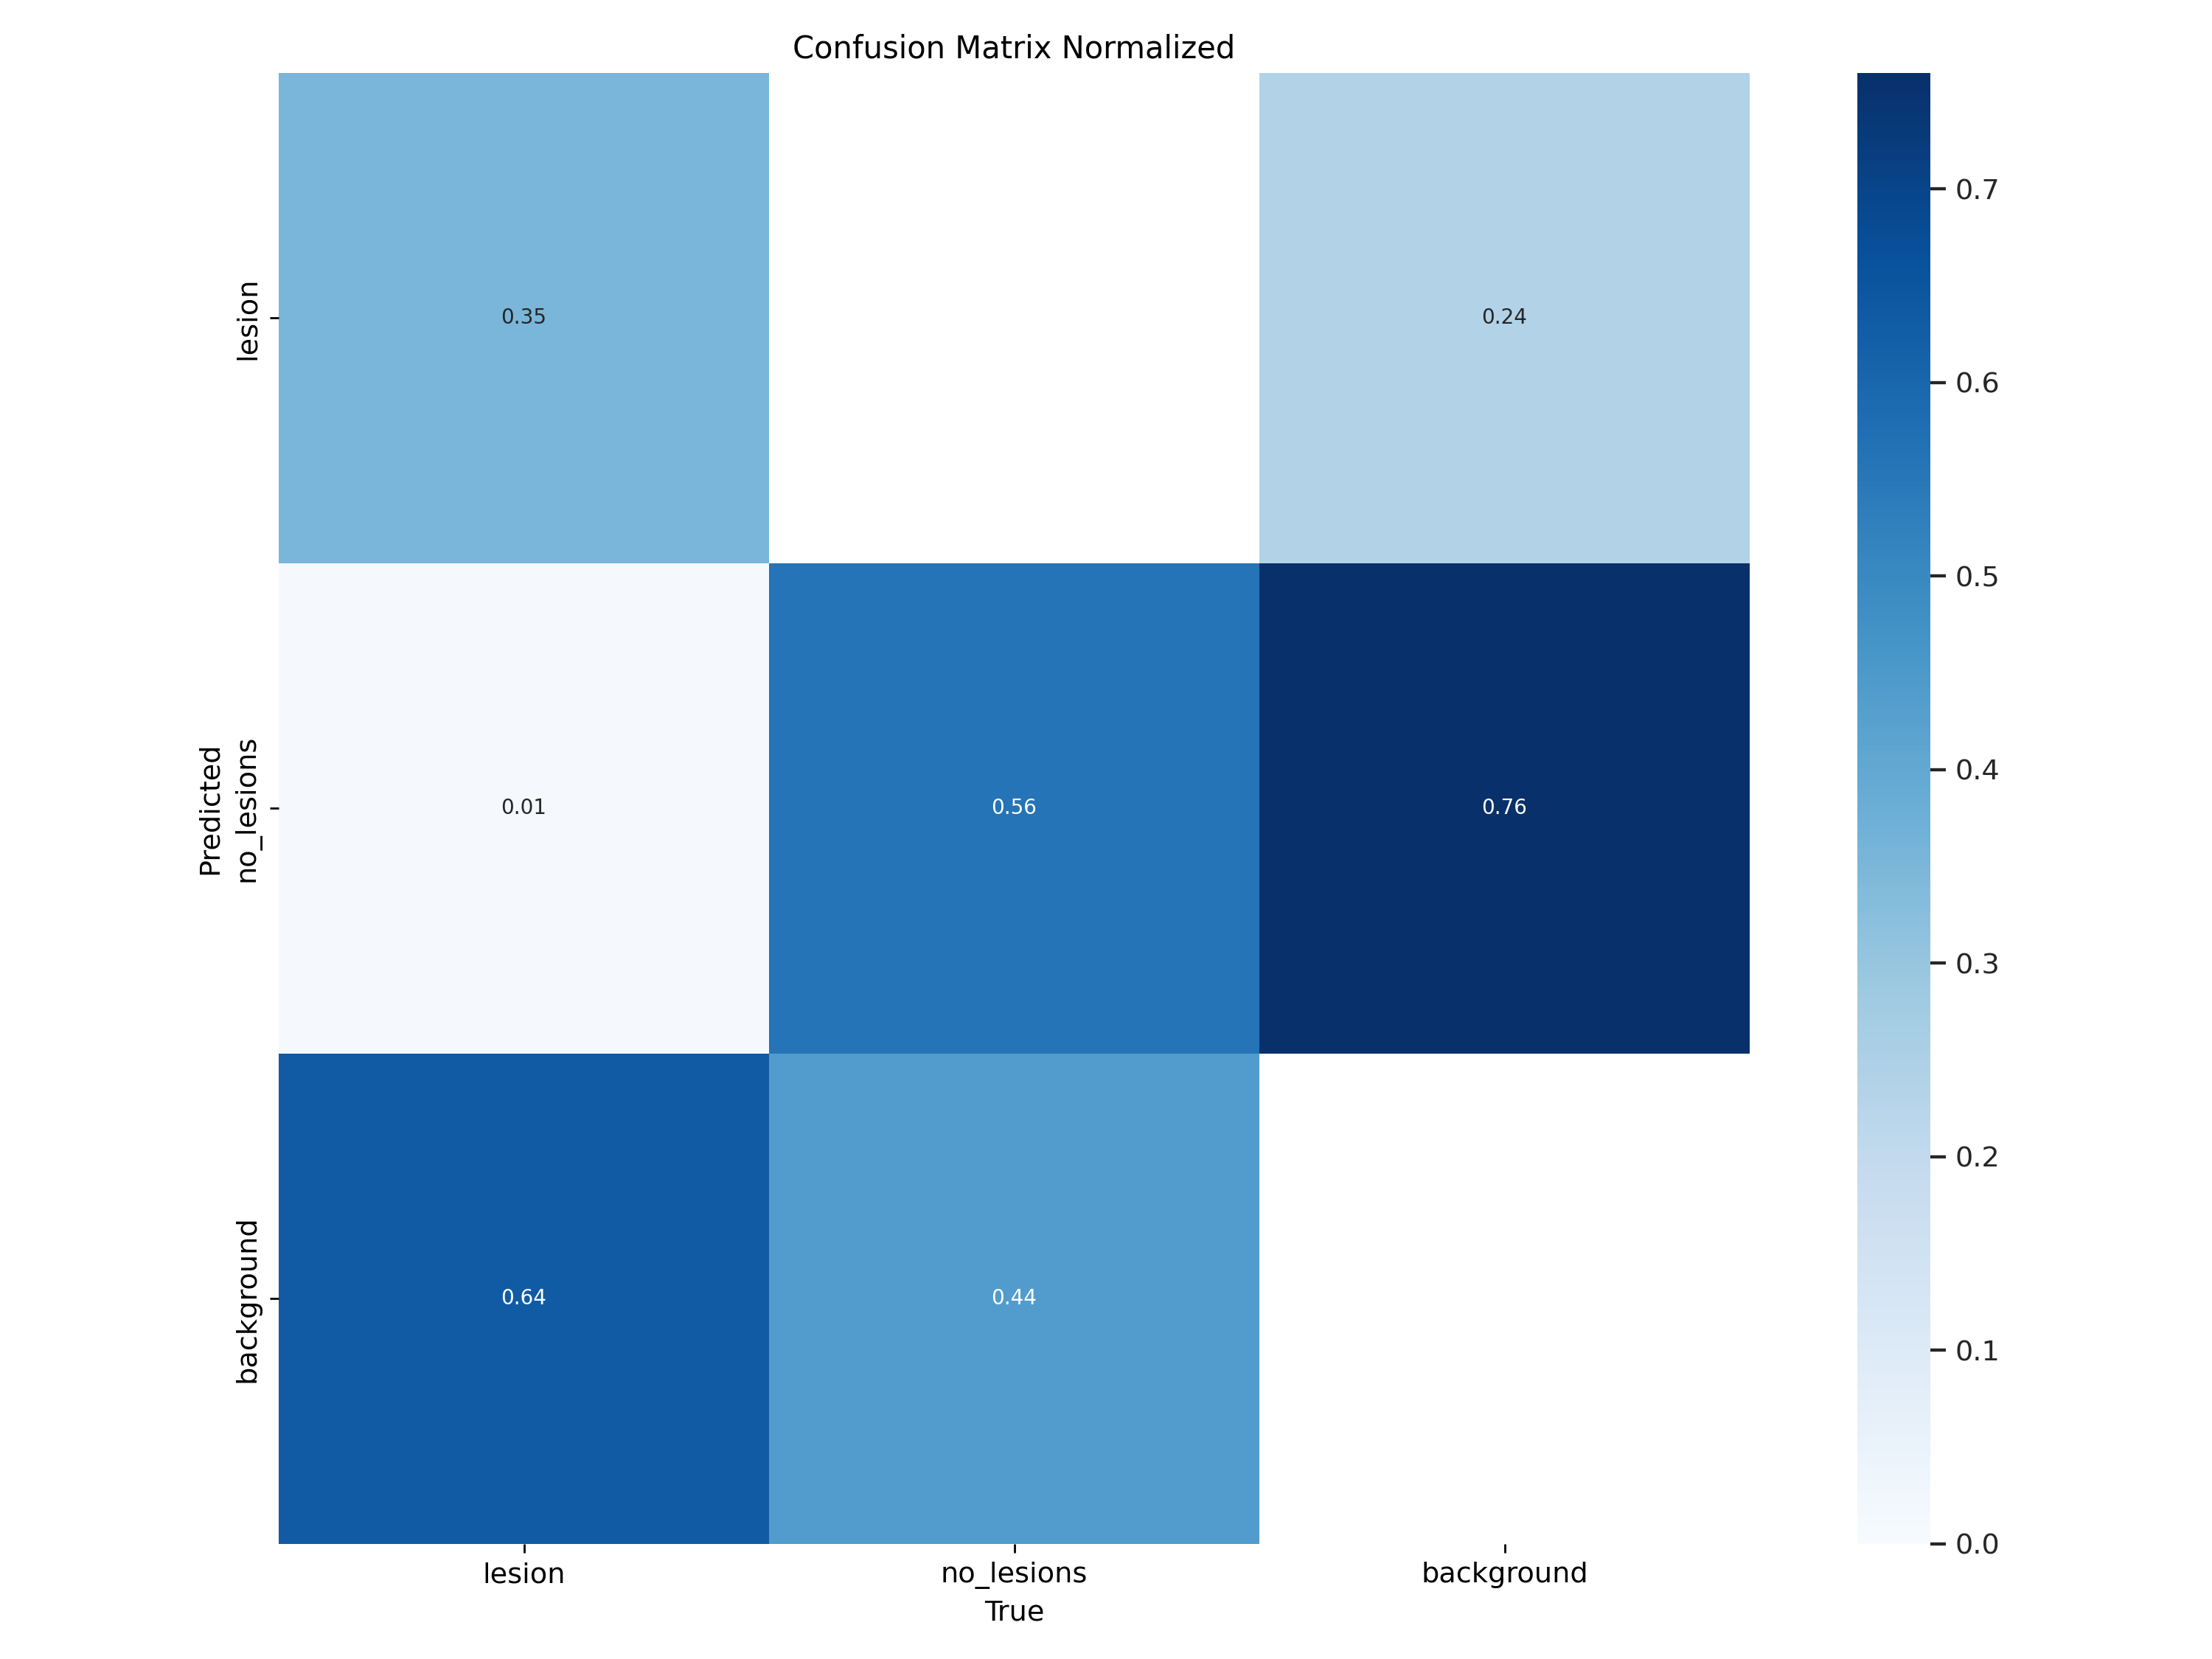

In [ ]:
%cd {HOME}
Image(filename=f'/root/datasets/runs/detect/train/confusion_matrix_normalized.png', width=600)

/content


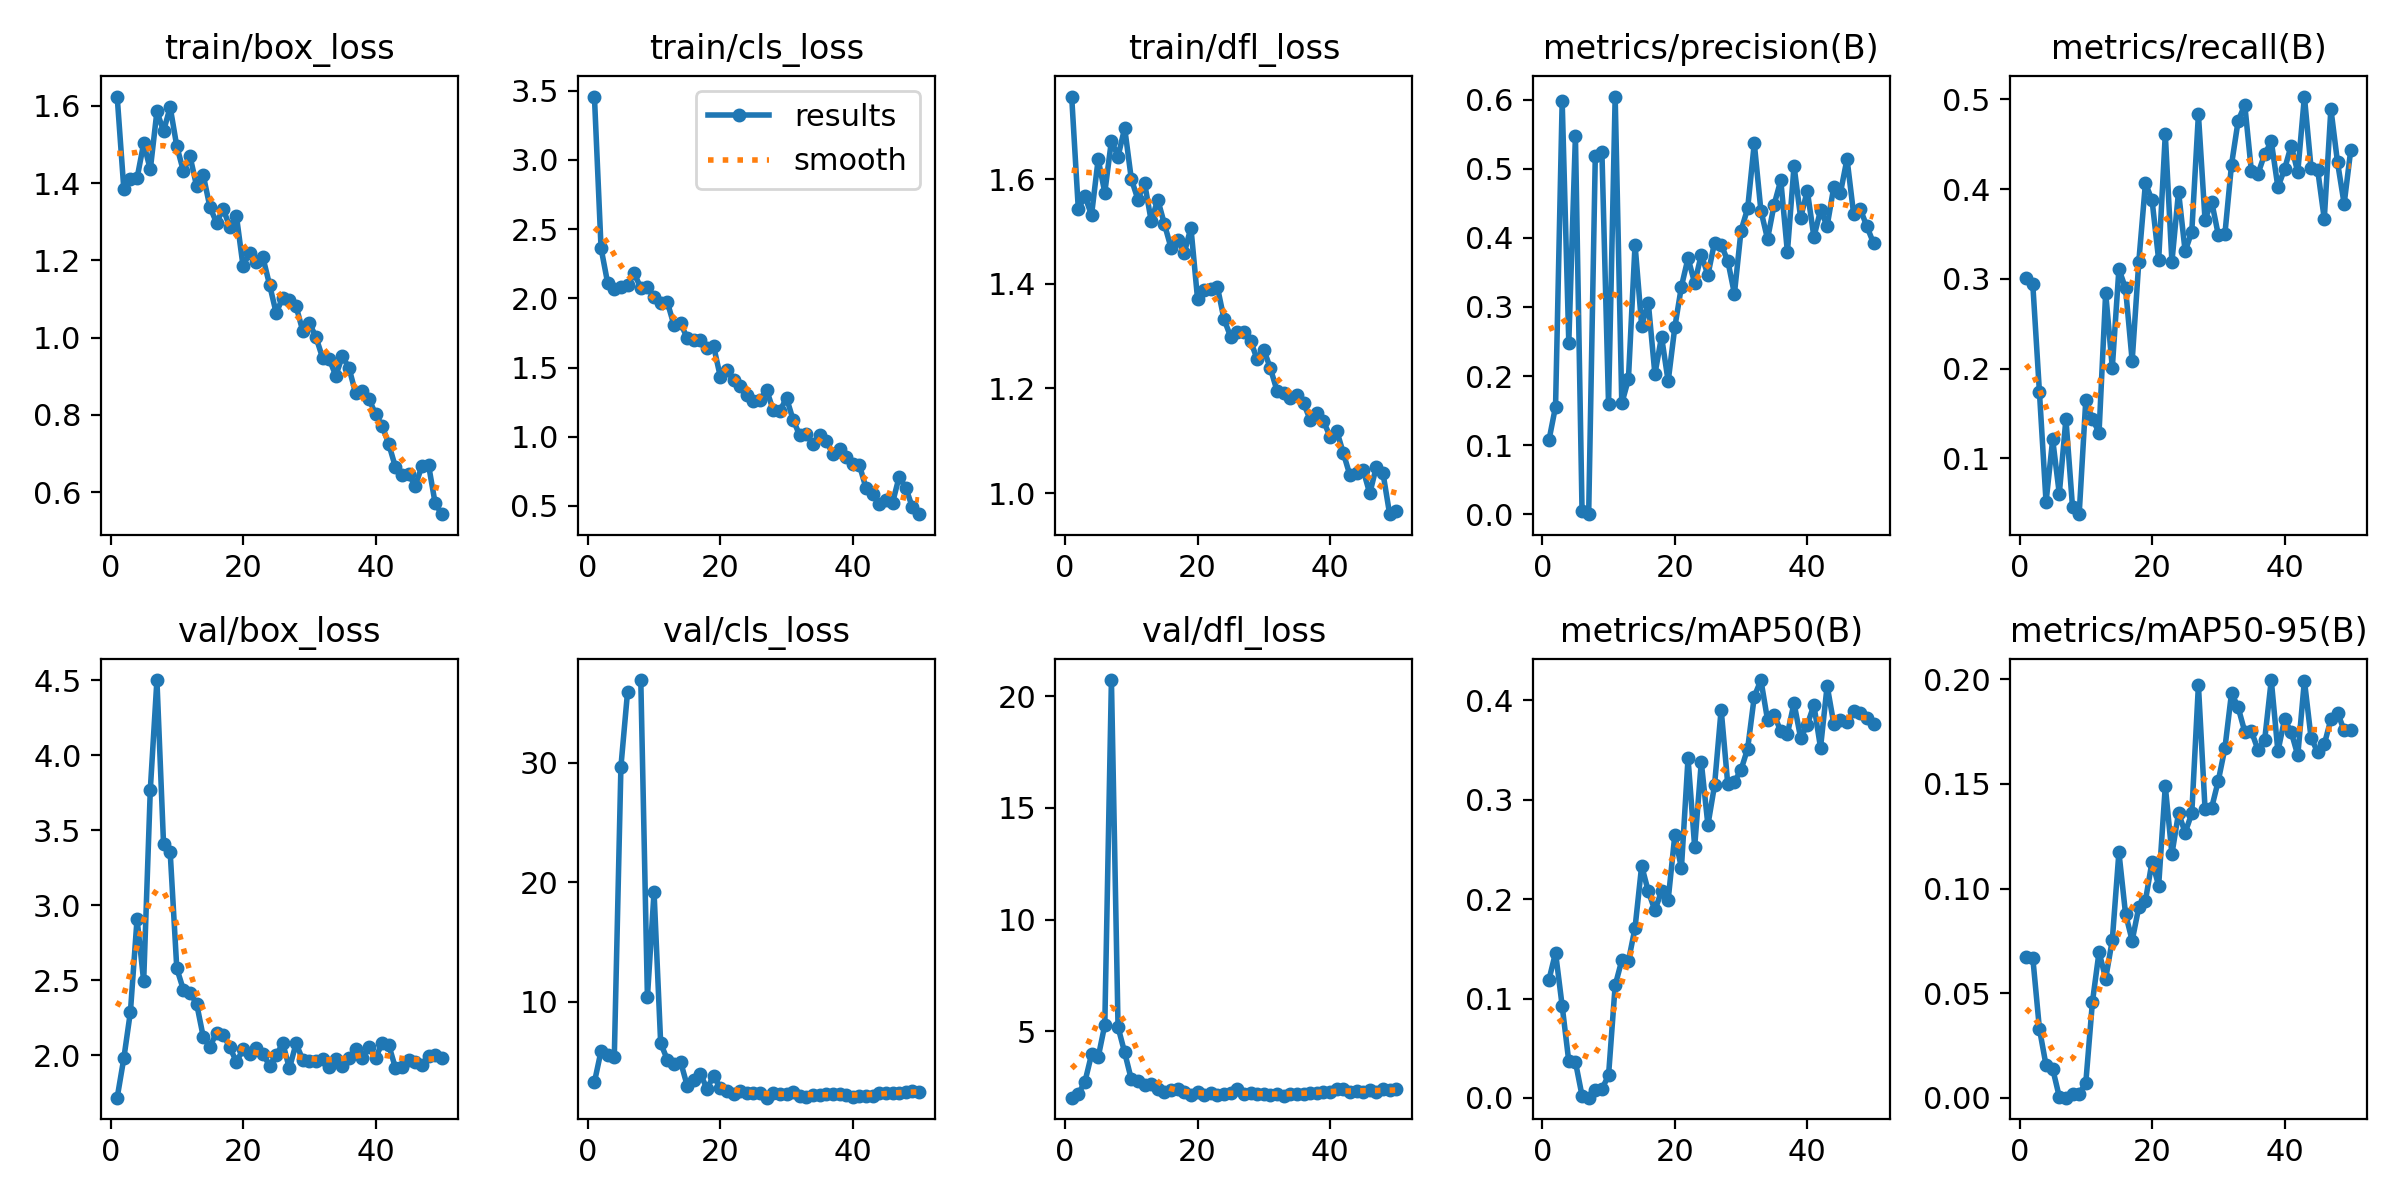

In [ ]:
%cd {HOME}
Image(filename=f'/root/datasets/runs/detect/train/results.png', width=600)

/content


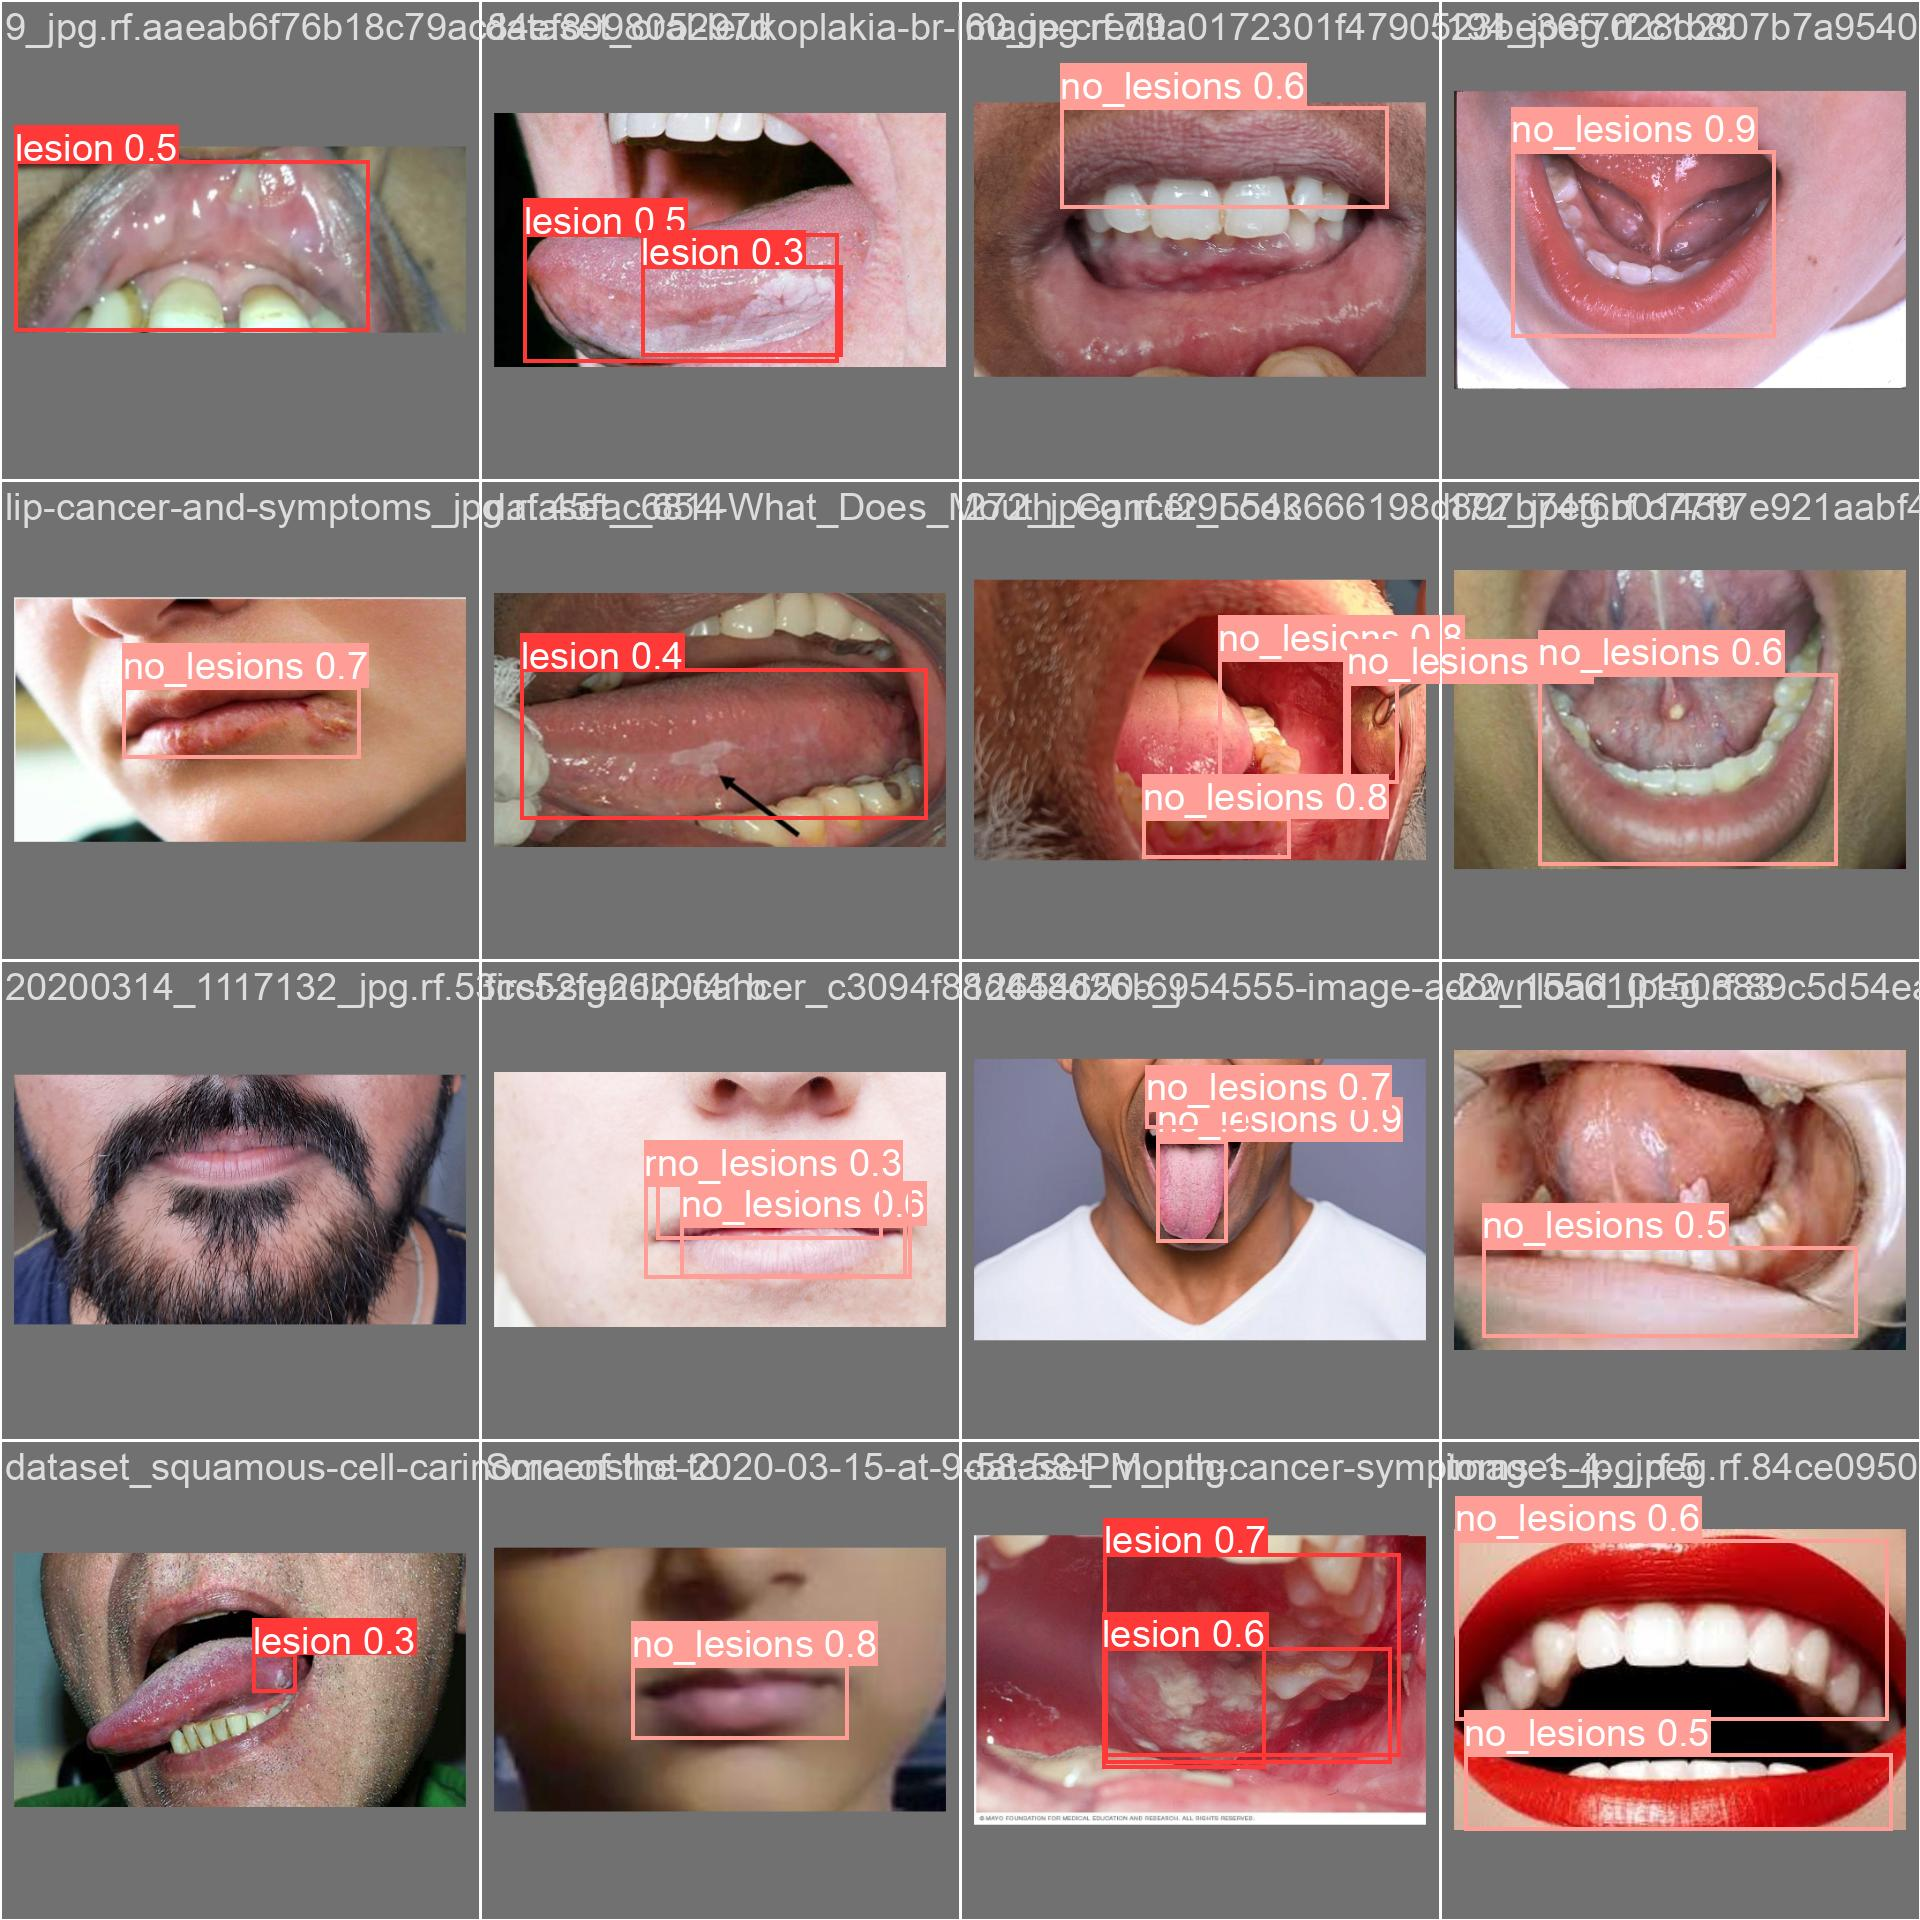

In [ ]:
%cd {HOME}
Image(filename=f'/root/datasets/runs/detect/train/val_batch0_pred.jpg', width=600)